In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from cartiflette.s3 import download_vectorfile_url_all
df = download_vectorfile_url_all(
    year = 2021,
    values = ["75", "92", "93", "94"],
    level="ARRONDISSEMENT",
    vectorfile_format = "gpkg",
    decoupage="departement")
departements = df.dissolve("INSEE_DEP")

Downloading: : 116kiB [00:00, 20.9MiB/s]
Downloading: : 140kiB [00:00, 21.2MiB/s]
Downloading: : 212kiB [00:00, 27.8MiB/s]
Downloading: : 180kiB [00:00, 24.3MiB/s]


<AxesSubplot: >

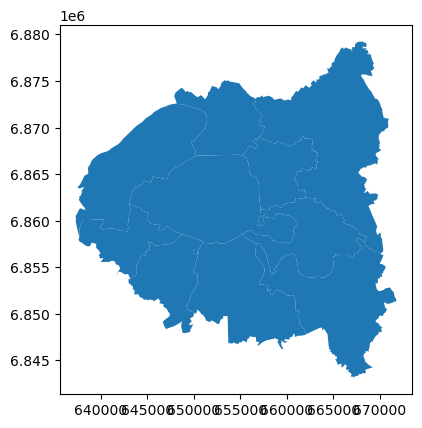

In [3]:
df.plot()

In [21]:
df['surface'] = df.area.div(10**6)
df['densite'] = (df['POPULATION']/df['surface']).round()
df['markersize'] = 8*df['densite'].div(df.area.div(10**6).sum())
df['markercolor'] = pd.cut(
    df['densite'],
    [0, 5000, 15000, 30000, 50000], labels=["Moins de 5", "Entre 5 et 15", "Entre 15 et 30","Plus de 30"])

In [22]:
df_points = df.copy()
df_points["geometry"] = df_points["geometry"].centroid

Text(0.3, 0.15, 'Source: IGN - AdminExpress')

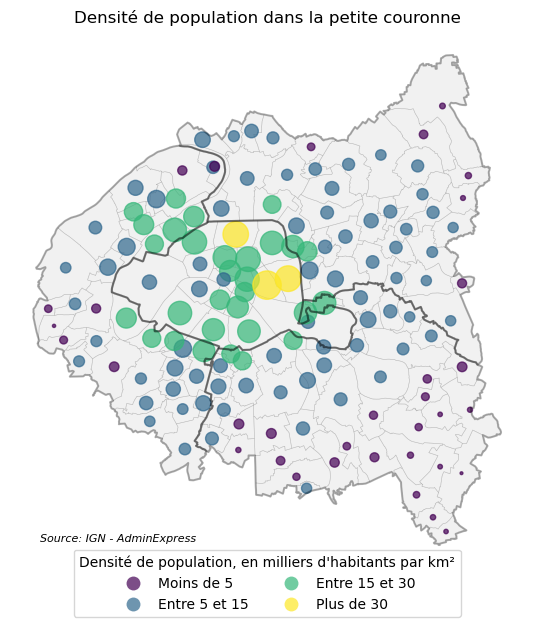

In [25]:
ax = df.plot(
    color="lightgray", edgecolor="grey",
    figsize=(7,7), 
    linewidth=0.4, alpha = 0.3)
df_points.plot(
    ax=ax,
    column="markercolor", markersize="markersize",
    alpha=0.7, #categorical=False,
    legend = True,
    legend_kwds={'loc': 'upper center', "ncol": 2, "bbox_to_anchor": (0.5, 0.05)},
    cmap='viridis')
departements.boundary.plot(
    ax = ax, edgecolor = "black", alpha = 0.3)
ax.axis("off")
ax.set(title='Densité de population dans la petite couronne')
ax.get_legend().set_title("Densité de population, en milliers d'habitants par km²")
plt.figtext(0.3, 0.15,
            "Source: IGN - AdminExpress",
            wrap=True, horizontalalignment='center',
            fontsize=8, style = "italic")

# Version actuelle

## Récupération des données

In [61]:
import requests
import shutil
import py7zr
import os
import numpy as np
import pandas as pd
import geopandas as gpd

url = "https://wxs.ign.fr/x02uy2aiwjo9bm8ce5plwqmr/telechargement/prepackage/ADMINEXPRESS_SHP_TERRITOIRES_PACK_2022-09-20$ADMIN-EXPRESS_3-1__SHP__FRA_L93_2022-09-20/file/ADMIN-EXPRESS_3-1__SHP__FRA_L93_2022-09-20.7z"
dirname = url.split("/")[-1]
filename = dirname.replace(".7z", "")

# Telechargement du fichier
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        with open(local_filename, 'wb') as f:
            shutil.copyfileobj(r.raw, f)

    return local_filename

download_file(url)

# Dezip
with py7zr.SevenZipFile(dirname, mode='r') as z:
    z.extractall()
    
# Chercher dans l'arborescence les bons fichiers
os.listdir(filename)
os.listdir(f'{filename}/ADMIN-EXPRESS/')
os.listdir(f'{filename}/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2022-09-20')
os.listdir(f'{filename}/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2022-09-20/ADE_3-1_SHP_LAMB93_FR')
dir_shp = f'{filename}/ADMIN-EXPRESS/1_DONNEES_LIVRAISON_2022-09-20/ADE_3-1_SHP_LAMB93_FR'

# Import des données
france_communes = gpd.read_file(f"{dir_shp}/COMMUNE.shp") 
france_arrondissements = gpd.read_file(f"{dir_shp}/ARRONDISSEMENT_MUNICIPAL.shp") 
france_arrondissements['INSEE_DEP'] = france_arrondissements['INSEE_COM'].str[:2]

# Consolidation du shapefile
dep = france_communes.loc[france_communes["INSEE_DEP"].isin(["92","93","94"])]
paris = france_arrondissements.loc[france_arrondissements["INSEE_DEP"] == "75"]
df['INSEE_COG'] = np.where(df['INSEE_DEP'] == "75", df['INSEE_ARM'], df['INSEE_COM'])

Text(0.3, 0.15, 'Source: IGN - AdminExpress')

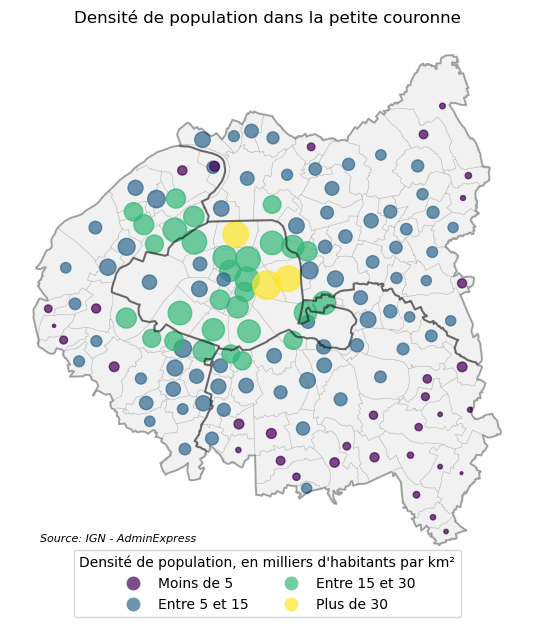

In [66]:
ax = df.plot(
    color="lightgray", edgecolor="grey",
    figsize=(7,7), 
    linewidth=0.4, alpha = 0.3)
df_points.plot(
    ax=ax,
    column="markercolor", markersize="markersize",
    alpha=0.7, #categorical=False,
    legend = True,
    legend_kwds={'loc': 'upper center', "ncol": 2, "bbox_to_anchor": (0.5, 0.05)},
    cmap='viridis')
departements.boundary.plot(
    ax = ax, edgecolor = "black", alpha = 0.3)
ax.axis("off")
ax.set(title='Densité de population dans la petite couronne')
ax.get_legend().set_title("Densité de population, en milliers d'habitants par km²")
plt.figtext(0.3, 0.15,
            "Source: IGN - AdminExpress",
            wrap=True, horizontalalignment='center',
            fontsize=8, style = "italic")